In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#DATA

In [5]:
df_2019 = pd.read_csv('2019.csv')
df_2019

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [7]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [9]:
df_2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [11]:
df_2019.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


Sơ lược ta có thể thấy các yếu tố như GDP, hỗ trợ xã hội, sức khỏe và sự hào phóng có ảnh hướng lớn đến chỉ số hạnh phúc (> 0.7)




# Mối quan hệ giữa GDP với chỉ số hạnh phúc

     GDP per capita  Score
0             1.340  7.769
1             1.383  7.600
2             1.488  7.554
3             1.380  7.494
4             1.396  7.488
..              ...    ...
151           0.359  3.334
152           0.476  3.231
153           0.350  3.203
154           0.026  3.083
155           0.306  2.853

[156 rows x 2 columns]


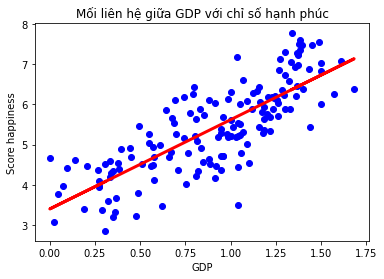

In [14]:
def GDP_hapiness(df):
    df1 = pd.DataFrame()
    df1['GDP per capita'] = df['GDP per capita']
    df1['Score'] = df['Score']
    print(df1)

    plt.title('Mối liên hệ giữa GDP với chỉ số hạnh phúc')
    plt.xlabel('GDP')
    plt.ylabel('Score happiness')
    plt.scatter(df1['GDP per capita'],df1['Score'],color='blue')

    X = np.array([df1['GDP per capita']]).T
    ones = np.ones((len(X),1))
    X = np.concatenate((ones,X),axis=1)
    y = np.array([df1['Score']]).T

    regression = LinearRegression()
    regression.fit(X, y)

    theta = np.array([regression.intercept_, [regression.coef_[0][-1]]])

    x_pre = np.array([df1['GDP per capita']]).T
    y_pre = X @ theta

    plt.plot(x_pre, y_pre, color='red',linewidth=3)

    plt.show()
GDP_hapiness(df_2019)

Tổng quan nếu GDP cao thì chỉ số hạnh phúc cao
Tuy nhiên có nhiều điểm nằm xa đường line màu đỏ, chứng tỏ chỉ số hạnh phúc không chỉ phụ thuộc vào GDP mà còn phụ thuộc vào nhiều yếu tố khác

# Mối quan hệ giữa chỉ số hỗ trợ xã hội với chỉ số hạnh phúc


     Social support  Score
0             1.587  7.769
1             1.573  7.600
2             1.582  7.554
3             1.624  7.494
4             1.522  7.488
..              ...    ...
151           0.711  3.334
152           0.885  3.231
153           0.517  3.203
154           0.000  3.083
155           0.575  2.853

[156 rows x 2 columns]


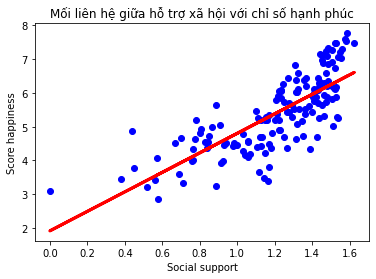

In [15]:
def social_support_hapiness(df):
    df1 = pd.DataFrame()
    df1['Social support'] = df['Social support']
    df1['Score'] = df['Score']
    print(df1)

    plt.title('Mối liên hệ giữa hỗ trợ xã hội với chỉ số hạnh phúc')
    plt.xlabel('Social support')
    plt.ylabel('Score happiness')
    plt.scatter(df1['Social support'], df1['Score'], color='blue')

    X = np.array([df1['Social support']]).T
    ones = np.ones((len(X), 1))
    X = np.concatenate((ones, X), axis=1)
    y = np.array([df1['Score']]).T

    regression = LinearRegression()
    regression.fit(X, y)

    theta = np.array([regression.intercept_, [regression.coef_[0][-1]]])

    x_pre = np.array([df1['Social support']]).T
    y_pre = X @ theta

    plt.plot(x_pre, y_pre, color='red', linewidth=3)
    plt.show()
social_support_hapiness(df_2019)

Cũng tượng tự với biểu đồ mối quan hệ GDP với chỉ số hạnh phúc, chỉ số hỗ trợ xã hội tăng thì chỉ số hạnh phúc cũng tương đối tăng theo, tuy nhiên vẫn còn nhiều điểm cách xa đường line màu đỏ
Điều này có nghĩa chỉ số hạnh phúc cũng không phụ thuộc duy nhất vào chỉ số hỗ trợ xã hội

## KẾT
Chỉ số hạnh phúc phải phụ thuộc vào nhiều yếu tố chứ không có yếu tố nào quyết định đến chỉ số này

# TIỀN NHIỀU CHƯA CHẮC BẠN ĐÃ HẠNH PHÚC NHƯNG KHI BẠN NHIỀU TIỀN BẠN ĐÃ ĐẶT MỘT CHÂN ĐẾN SỰ HẠNH PHÚC